In [52]:
import pandas as pd
import random, numpy
from IPython.display import HTML
from matplotlib import pylab
from matplotlib import pyplot as plt

In [24]:
HTML('<h2> Sampling and Standard Error')

In [25]:
HTML('''
<li> For some experiments (like election polls) sampling something real, repeated polls are not possible so we can't create samples by simulation, but 
Confidence Intervals are generated.
<li> Probability Sampling: each member of population has non-zero chance of being included in sample.
<br>

<p><b>Simple Random Sampling: </b></p>
<li> Each member has equal chance of being chosen in sample.
<br>

<p><b>Stratified Sampling: </b></p>
<li> Suppose we are sampling to check what % students at MIT are nerds and we see 60%
If Engineering major has most students and possibly all nerds observed are from engineering and so there is a bias.
<li> Stratified sampling: From each sub-group, take simple random samples.

     
     ''')

In [26]:
temps_df = pd.read_csv('temperatures.csv')

In [79]:
import random, numpy

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1


def makeHist(data, title, xlabel, ylabel, bins = 20):
    pylab.hist(data, bins = bins)
    pylab.title(title)
    pylab.xlabel(xlabel)
    pylab.ylabel(ylabel)

def getHighs():
    inFile = open('temperatures.csv')
    population = []
    for l in inFile:
        try:
            tempC = float(l.split(',')[1])
            population.append(tempC)
        except:
            continue
    return population


def getMeansAndSDs(population, sample, verbose = False):
    popMean = sum(population)/len(population)
    sampleMean = sum(sample)/len(sample)
    if verbose:
        makeHist(population,
                 'Daily High 1961-2015, Population\n' +\
                 '(mean = '  + str(round(popMean, 2)) + ')',
                 'Degrees C', 'Number Days')
        pylab.figure()
        makeHist(sample, 'Daily High 1961-2015, Sample\n' +\
                 '(mean = ' + str(round(sampleMean, 2)) + ')',
                 'Degrees C', 'Number Days')   
        print('Population mean =', popMean)
        print('Standard deviation of population =',
              numpy.std(population))
        print('Sample mean =', sampleMean)
        print('Standard deviation of sample =',
              numpy.std(sample))
    return popMean, sampleMean,\
           numpy.std(population), numpy.std(sample)



Population mean = 16.298769461986048
Standard deviation of population = 9.437558544803602
Sample mean = 17.0685
Standard deviation of sample = 10.390314372048614


(16.298769461986048, 17.0685, 9.437558544803602, 10.390314372048614)

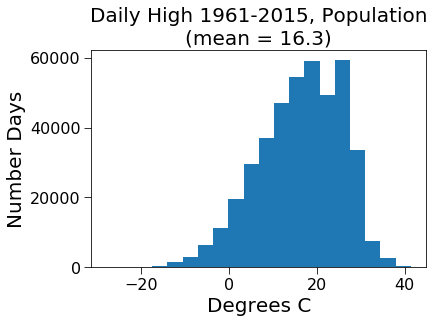

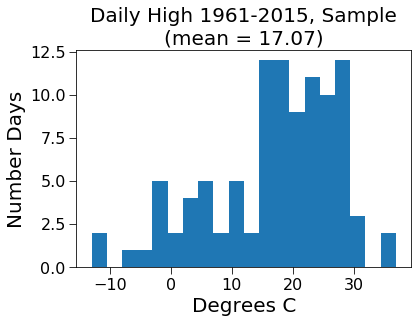

In [57]:
# T] plot side by side

random.seed(0)         
population = getHighs()
# sample without replacement
sample = random.sample(population, 100)
getMeansAndSDs(population, sample, True)


Mean of sample Means = 16.294
Standard deviation of sample means = 0.943


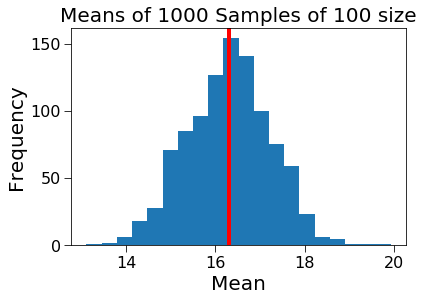

In [106]:
random.seed(0) 
population = getHighs()
sampleSize = 100
numSamples = 1000
sampleMeans = []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD =\
      getMeansAndSDs(population, sample, verbose = False)
    sampleMeans.append(sampleMean)
print('Mean of sample Means =',
     round(sum(sampleMeans)/len(sampleMeans), 3))
print('Standard deviation of sample means =',
     round(numpy.std(sampleMeans), 3))
makeHist(sampleMeans, 'Means of '+str(numSamples)+' Samples of '+str(sampleSize)+' size' , 'Mean', 'Frequency')
pylab.axvline(x = popMean, color = 'r')

In [102]:
HTML('''
<li> With 1000 samples, the distribution gets closer to population, central limit theorem holds true.
<li> 95% C.I. 
<br>= 16.29 +- (0.95 * 0.943)
<br>=  to 

<br>
<li> Standard deviation hardly changes with number of samples.


'''
)

[1.318787374029643, 1.0053313241911843, 0.7064000708875964, 0.5175415224646237, 0.46485751939942627, 0.44740799259288966, 0.402357328713478]


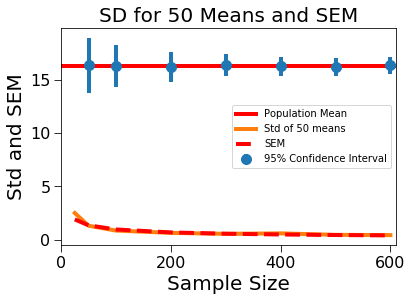

In [81]:
def showErrorBars(population, sizes, numTrials):
    xVals = []
    sizeMeans, sizeSDs = [], []
    for sampleSize in sizes:
        xVals.append(sampleSize)
        trialMeans = []
        for t in range(numTrials):
            sample = random.sample(population, sampleSize)
            popMean, sampleMean, popSD, sampleSD =\
               getMeansAndSDs(population, sample)
            trialMeans.append(sampleMean)
        sizeMeans.append(sum(trialMeans)/len(trialMeans))
        sizeSDs.append(numpy.std(trialMeans))
    print(sizeSDs)
    pylab.errorbar(xVals, sizeMeans,
                   yerr = 1.96*pylab.array(sizeSDs), fmt = 'o',
                   label = '95% Confidence Interval')
    pylab.title('Mean Temperature ('
                + str(numTrials) + ' trials)')
    pylab.xlabel('Sample Size')
    pylab.ylabel('Mean')
    pylab.axhline(y = popMean, color ='r', label = 'Population Mean')
    pylab.xlim(0, sizes[-1] + 10)
    pylab.legend()

random.seed(0)
population = getHighs()   
showErrorBars(population,
             (50, 100, 200, 300, 400, 500, 600), 100)

def sem(popSD, sampleSize):
    return popSD/sampleSize**0.5

sampleSizes = (25, 50, 100, 200, 300, 400, 500, 600)
numTrials = 50
population = getHighs()
popSD = numpy.std(population)
sems = []
sampleSDs = []
for size in sampleSizes:
    sems.append(sem(popSD, size))
    means = []
    for t in range(numTrials):
        sample = random.sample(population, size)
        means.append(sum(sample)/len(sample))
    sampleSDs.append(numpy.std(means))
pylab.plot(sampleSizes, sampleSDs,
          label = 'Std of ' + str(numTrials) + ' means')
pylab.plot(sampleSizes, sems, 'r--', label = 'SEM')
pylab.xlabel('Sample Size')
pylab.ylabel('Std and SEM')
pylab.title('SD for ' + str(numTrials) + ' Means and SEM')
pylab.legend()
plt.show()

In [103]:
HTML(
'''
<li> CI gets tighter as sample size increases

''')

In [107]:
HTML('''
<h3> Standard Error of the mean </h3>

<li>The standard error of the mean is the standard deviation of the sampling distribution of the mean.<>

<li> Standard error of population mean:
<br><b> Population S.D. / sprt(sample size)

''')

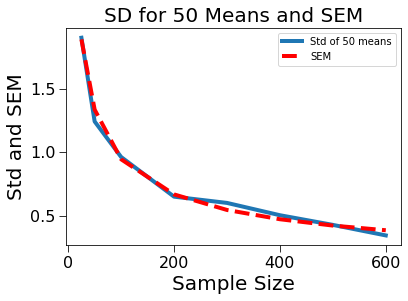

In [94]:
random.seed(0)

def sem(popSD, sampleSize):
    return popSD/sampleSize**0.5

sampleSizes = (25, 50, 100, 200, 300, 400, 500, 600)
numTrials = 50
population = getHighs()
popSD = numpy.std(population)
sems = []
sampleSDs = []
for size in sampleSizes:
   sems.append(sem(popSD, size))
   means = []
   for t in range(numTrials):
       sample = random.sample(population, size)
       means.append(sum(sample)/len(sample))
   sampleSDs.append(numpy.std(means))
pylab.plot(sampleSizes, sampleSDs,
          label = 'Std of ' + str(numTrials) + ' means')
pylab.plot(sampleSizes, sems, 'r--', label = 'SEM')
pylab.xlabel('Sample Size')
pylab.ylabel('Std and SEM')
pylab.title('SD for ' + str(numTrials) + ' Means and SEM')
pylab.legend()

In [96]:
HTML(
'''
<li> Std. Error we get by considering 1 sample and get std error from mean

<li> Std. DEV and  Std. Error get close as sample size increases

''')

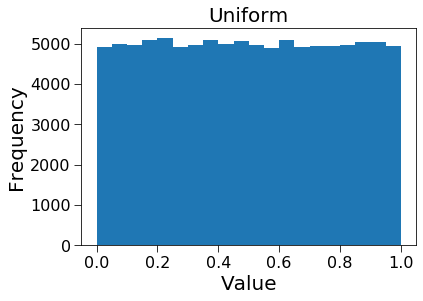

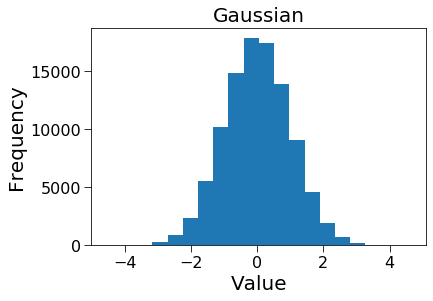

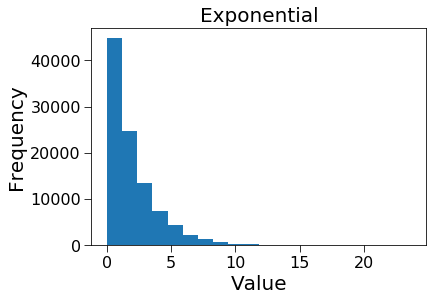

In [98]:
HTML('''
<li> True for a different distribution of population?
<li> True for different size of population?
<br>
1. Consider 3 different distribution:



''')


def plotDistributions():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    makeHist(uniform, 'Uniform', 'Value', 'Frequency')
    pylab.figure()
    makeHist(normal, 'Gaussian', 'Value', 'Frequency')
    pylab.figure()
    makeHist(exp, 'Exponential', 'Value', 'Frequency')

plotDistributions()

In [99]:
HTML(
'''
<li> If populations is skewed, number of samples required is high
<li> Sample size does not matter
'''

)